In [1]:
#Ejecutar el siguiente comando en una terminal y auntenticarse con el web browser para poder ejecutar el código
#gcloud auth application-default login
#ver donde guarda las credenciales, ejemplo: Credentials saved to file: [/home/mlaciar/.config/gcloud/application_default_credentials.json]
#export GOOGLE_APPLICATION_CREDENTIALS="/home/mlaciar/.config/gcloud/application_default_credentials.json"
#echo $GOOGLE_APPLICATION_CREDENTIALS

In [24]:
# Query a table and write the results to a DataFrame.
# This will only work in a Jupyter notebook.
from google.cloud import bigquery
import pandas as pd
project_id = "big7-427201"
client = bigquery.Client(project=project_id)
sql = """
    SELECT 
        DATE,
        TASA_POLITICA_MONETARIA_NA,
        TASA_DEPOSITOS_30D_NA
    FROM `big7-427201.TBL.DM_BCRA_PRINCIPALES_VARIABLES`
    WHERE
        DATE BETWEEN '2020-01-01' AND '2024-06-01'"""

/home/mlaciar/python_projects/caece/.venv/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [25]:
# Download query results and write to a DataFrame
query_job = client.query(sql)
df = query_job.to_dataframe()


/home/mlaciar/python_projects/caece/.venv/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [74]:
df.head()

,DATE,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA,day_of_week
359,2023-01-02,75.0,68.67,0
364,2023-01-03,75.0,70.46,1
357,2023-01-04,75.0,70.83,2
363,2023-01-05,75.0,70.25,3
360,2023-01-06,75.0,70.78,4


In [27]:
#print dataframe columns
print(df.columns)

Index(['DATE', 'TASA_POLITICA_MONETARIA_NA', 'TASA_DEPOSITOS_30D_NA'], dtype='object')


In [33]:
#Vemos los tipos de datos de las columnas
df.dtypes

DATE                           dbdate
TASA_POLITICA_MONETARIA_NA    float64
TASA_DEPOSITOS_30D_NA         float64
dtype: object

In [34]:
# Convertimos la columna DATE a tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE                          datetime64[ns]
TASA_POLITICA_MONETARIA_NA           float64
TASA_DEPOSITOS_30D_NA                float64
dtype: object

In [28]:
# Analizamos la totalidad de los datos
df.describe()

,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA
count,345.000000,345.000000
mean,94.046377,90.789942
std,23.245733,25.277037
min,40.000000,30.180000
25%,75.000000,70.830000
50%,97.000000,92.800000
75%,100.000000,109.400000
max,133.000000,130.420000


In [29]:
# Veamos algunos registros
df[['DATE','TASA_POLITICA_MONETARIA_NA','TASA_DEPOSITOS_30D_NA']].sort_values(by='DATE')

,DATE,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA
359,2023-01-02,75.0,68.67
364,2023-01-03,75.0,70.46
357,2023-01-04,75.0,70.83
363,2023-01-05,75.0,70.25
360,2023-01-06,75.0,70.78
...,...,...,...
352,2024-05-28,40.0,31.17
339,2024-05-29,40.0,31.46
351,2024-05-30,40.0,32.18
346,2024-05-31,40.0,31.00


In [30]:
# Cuantos nulos hay en cada columna
df.isnull().sum()

DATE                            0
TASA_POLITICA_MONETARIA_NA    172
TASA_DEPOSITOS_30D_NA         172
dtype: int64

In [35]:
# Veamos a que día de la semana corresponden los nulls
df[df['TASA_POLITICA_MONETARIA_NA'].isnull()]['DATE'].dt.dayofweek.value_counts()

DATE
5    74
6    73
0    11
4     6
1     4
3     3
2     1
Name: count, dtype: int64

In [36]:
# La mayoría son sábados y domingos, y el resto?

# Agregamos una columna con el día de la semana
df['day_of_week'] = df['DATE'].dt.dayofweek

# Veamos los registros que son nulls y no son sábados ni domingos
df[(df['TASA_POLITICA_MONETARIA_NA'].isnull()) & (df['day_of_week']!=5) & (df['day_of_week']!=6)]

,DATE,TASA_POLITICA_MONETARIA_NA,TASA_DEPOSITOS_30D_NA,day_of_week
3,2024-04-01,NaN,NaN,0
6,2023-05-01,NaN,NaN,0
10,2024-03-29,NaN,NaN,4
24,2023-08-21,NaN,NaN,0
28,2023-04-07,NaN,NaN,4
35,2024-02-13,NaN,NaN,1
40,2023-02-21,NaN,NaN,1
42,2023-02-20,NaN,NaN,0
47,2024-02-12,NaN,NaN,0
51,2023-12-08,NaN,NaN,4


In [39]:
# Son feriados! 
# Entonces, podríamos quitar los nulos de nuestro dataframe
df = df.dropna()
df.isnull().sum()

DATE                          0
TASA_POLITICA_MONETARIA_NA    0
TASA_DEPOSITOS_30D_NA         0
day_of_week                   0
dtype: int64

In [45]:
df = df.sort_values(by='DATE')

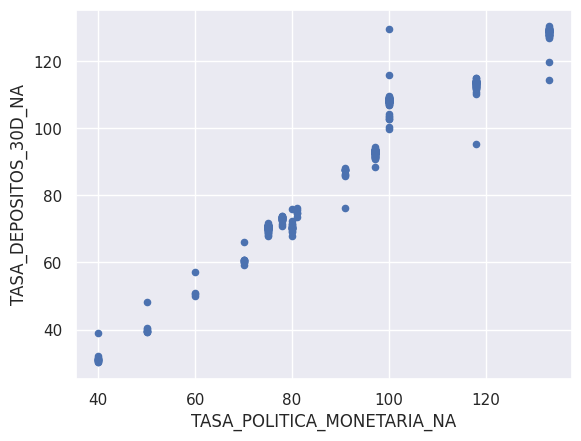

In [44]:
# Scatter plot between two columns
df.plot.scatter(x='TASA_POLITICA_MONETARIA_NA', y='TASA_DEPOSITOS_30D_NA')
plt.show()

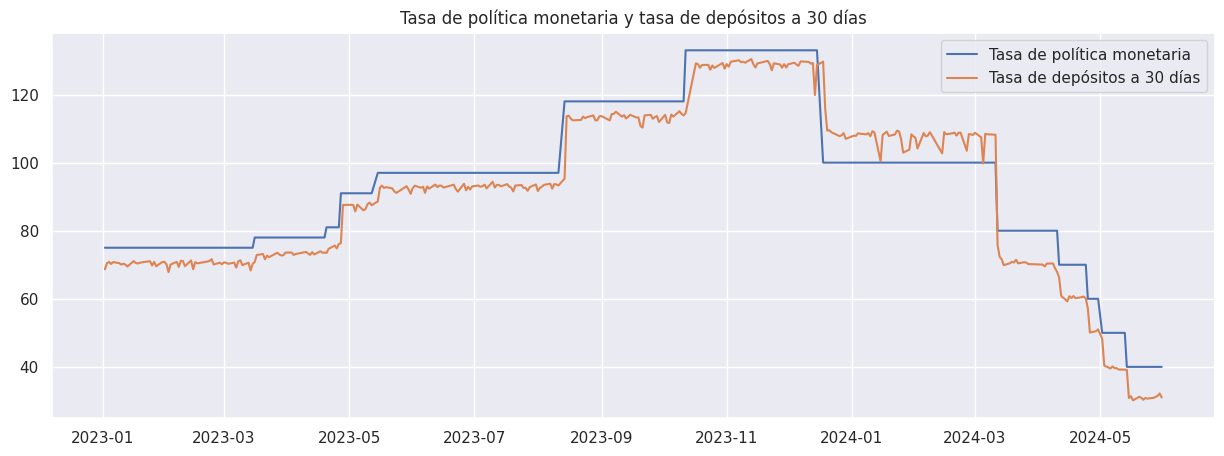

In [48]:
# Veamos las series temporales
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(df['DATE'],df['TASA_POLITICA_MONETARIA_NA'])
plt.plot(df['DATE'],df['TASA_DEPOSITOS_30D_NA'])
plt.title('Tasa de política monetaria y tasa de depósitos a 30 días')
plt.legend(['Tasa de política monetaria','Tasa de depósitos a 30 días'])
plt.show()

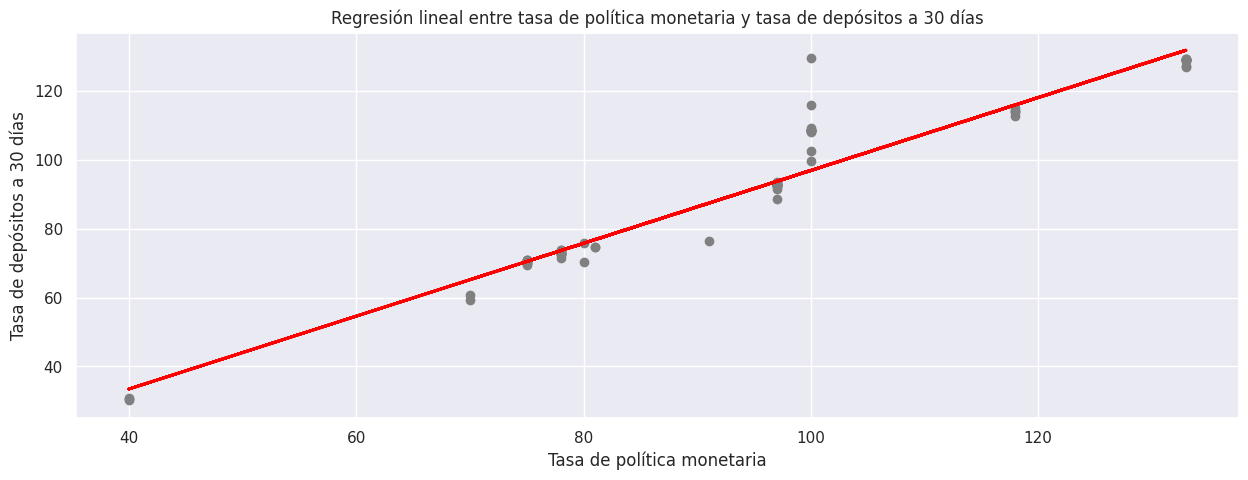

In [61]:
# Hagamos una regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X = df['TASA_POLITICA_MONETARIA_NA'].values.reshape(-1,1)
y = df['TASA_DEPOSITOS_30D_NA'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [72]:
#print X_train and y_train number of rows
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(276, 1)
(276, 1)
(69, 1)
(69, 1)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión lineal entre tasa de política monetaria y tasa de depósitos a 30 días')
plt.xlabel('Tasa de política monetaria')
plt.ylabel('Tasa de depósitos a 30 días')
plt.show()


In [55]:
# Veamos las métricas
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.04112246104628
Mean Squared Error: 45.238016748577685
Root Mean Squared Error: 6.725921256495476


In [65]:
# Veamos la performance del modelo en el dataset de test
df_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_test.head()





,Actual,Predicted
0,92.58,93.757442
1,70.06,70.480483
2,72.82,73.654614
3,30.68,33.448958
4,71.63,73.654614


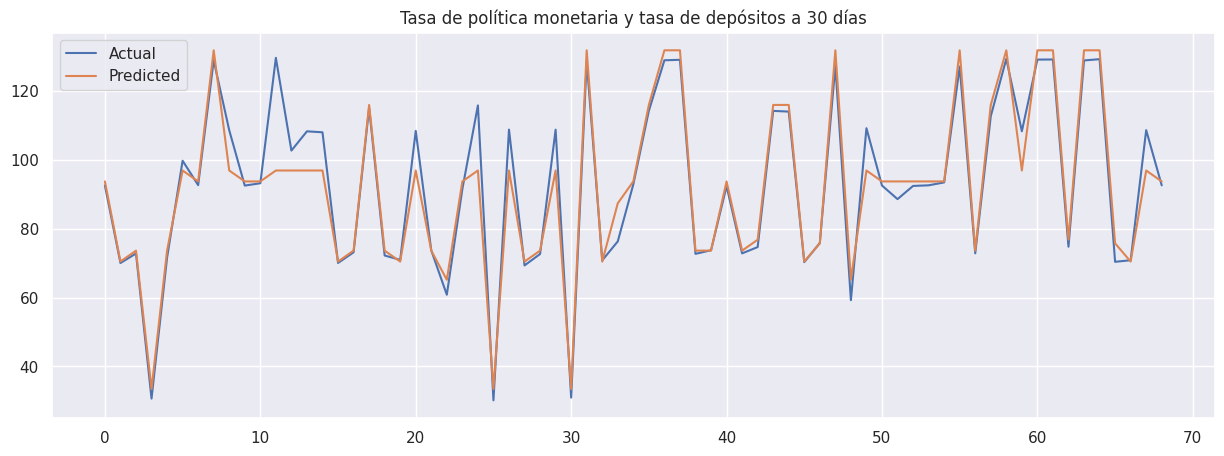

In [66]:
# Veamos las predicciones vs los valores reales en un grafico de lineas
plt.figure(figsize=(15,5))
plt.plot(df_test['Actual'])
plt.plot(df_test['Predicted'])
plt.title('Tasa de política monetaria y tasa de depósitos a 30 días')
plt.legend(['Actual','Predicted'])
plt.show()